In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_excel('1.xls', index_col = None)
data['DrainI'] = abs(data['DrainI'])
data

,Time,DrainI,SourceI,Time.1,GateI,GateV,GM,IDLIN,VT
0,0.517680,6.685453e-10,-1.964147e-10,0.519860,-2.085365e-09,10.000,#REF,0.000026,-27.641666
1,0.935976,6.345593e-10,-1.862872e-11,0.955917,-2.479204e-09,7.095,-1.16991e-11,0.000025,NaN
2,1.259041,7.776247e-10,3.669502e-10,1.261229,-2.817501e-09,4.195,4.93329e-11,0.000028,NaN
3,1.696690,4.136496e-09,3.737153e-09,1.716619,-2.655923e-09,1.290,1.15624e-09,0.000064,NaN
4,1.963058,7.832451e-08,7.805569e-08,1.983314,-2.832650e-09,-1.615,2.5538e-08,0.000280,NaN
...,...,...,...,...,...,...,...,...,...
59,10.593252,2.888790e-10,-1.073604e-10,10.595378,-2.494346e-09,-1.615,2.32065e-10,0.000017,NaN
60,11.055995,3.963813e-10,-3.029871e-10,11.076251,-2.403468e-09,1.290,-3.7006e-11,0.000020,NaN
61,11.848246,3.055116e-10,-1.232344e-10,11.832326,-2.534740e-09,4.195,3.12804e-11,0.000017,NaN
62,12.458570,3.062930e-10,-2.877913e-10,12.478680,-2.489301e-09,7.095,-2.69449e-13,0.000018,NaN


In [4]:
data = data.loc[:, ~np.array([False, False, False, False, False, False, False, False, True])]
data

,Time,DrainI,SourceI,Time.1,GateI,GateV,GM,IDLIN
0,0.517680,6.685453e-10,-1.964147e-10,0.519860,-2.085365e-09,10.000,#REF,0.000026
1,0.935976,6.345593e-10,-1.862872e-11,0.955917,-2.479204e-09,7.095,-1.16991e-11,0.000025
2,1.259041,7.776247e-10,3.669502e-10,1.261229,-2.817501e-09,4.195,4.93329e-11,0.000028
3,1.696690,4.136496e-09,3.737153e-09,1.716619,-2.655923e-09,1.290,1.15624e-09,0.000064
4,1.963058,7.832451e-08,7.805569e-08,1.983314,-2.832650e-09,-1.615,2.5538e-08,0.000280
...,...,...,...,...,...,...,...,...
59,10.593252,2.888790e-10,-1.073604e-10,10.595378,-2.494346e-09,-1.615,2.32065e-10,0.000017
60,11.055995,3.963813e-10,-3.029871e-10,11.076251,-2.403468e-09,1.290,-3.7006e-11,0.000020
61,11.848246,3.055116e-10,-1.232344e-10,11.832326,-2.534740e-09,4.195,3.12804e-11,0.000017
62,12.458570,3.062930e-10,-2.877913e-10,12.478680,-2.489301e-09,7.095,-2.69449e-13,0.000018


In [5]:
#is the voltage always the highest at the most negative value?
data['DrainI'][np.argmin(data['GateV'])]

0.0010916307801380754

In [7]:
data['DrainI']

0     6.685453e-10
1     6.345593e-10
2     7.776247e-10
3     4.136496e-09
4     7.832451e-08
          ...     
59    2.888790e-10
60    3.963813e-10
61    3.055116e-10
62    3.062930e-10
63    2.966447e-10
Name: DrainI, Length: 64, dtype: float64

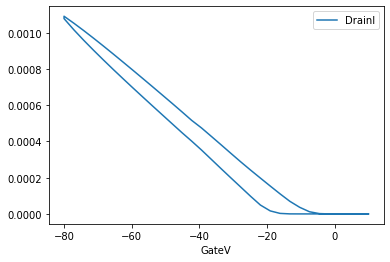

In [36]:
#plot the drain current vs the gate voltage  
data.plot(kind='line', x = 'GateV', y = "DrainI")
plt.show()

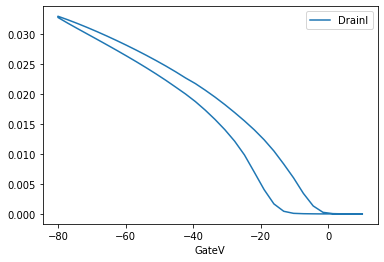

In [8]:
'''
from scipy.interpolate import UnivariateSpline 

v = np.linspace(-25, -5, 128)
slope = np.mean(f.derivative()(v))

datarr = data.to_numpy()
gatev = datarr[:, 5]
draini = datarr[:,1]
dx = np.diff(gatev)
dy = np.diff(draini)
dy_dx = dy/np.clip(dx, 1e-6, None)

newx = (gatev[:-1]+gatev[1:])/2

plt.plot(newx, dy_dx)
plt.show()
scipy.interpolate.UnivariateSpline(gatev, draini)
'''
import math

for x in range(len(data['DrainI'])):
    data['DrainI'][x] = math.sqrt(abs(data['DrainI'][x]))

data.plot(kind='line', x = 'GateV', y = "DrainI")
plt.show()

In [17]:
'''
for i in range(len(datarr[0, :])):
    if 'DrainI' in data.columns[i]:
        draincurrent32 = datarr[32,i]
        draincurrent = datarr[:,i]
    if 'GateV' in data.columns[i]:
        gatevoltage32 = datarr[32,i]
        gatevoltage = datarr[:,i]
print(draincurrent32)
gatevoltage32

'''
from statistics import mean

gatelist = []
drainlist = []
#gate is first (x), then the drain (y)
for i in range(len(data['GateV'])):
    if data['GateV'][i] < -9.9:
        gatelist.append(data['GateV'][i])
        drainlist.append(data['DrainI'][i])
    if data['GateV'][i] < -30.01:
        break

print(gatelist)
print(drainlist)
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(np.array(gatelist), np.array(drainlist))

print(m,b)

[-10.324999809265137, -13.225000381469727, -16.1299991607666, -19.030000686645508, -21.934999465942383, -24.84000015258789, -27.739999771118164, -30.645000457763672]
[0.0060417991913986, 0.008341768693664221, 0.010525778733627237, 0.01240781523506402, 0.014063681198553349, 0.015555735357140206, 0.016950050882285787, 0.01828052443660062]
-0.0005965015166386828 0.0005523062831271578


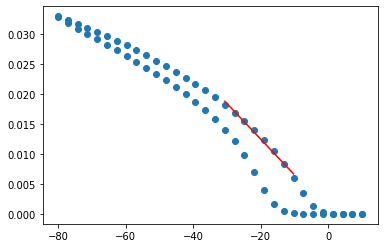

In [21]:
'''
import math 
absdI = list(map(abs, list(draincurrent)))

absdI_roots = [] 

for i in absdI:
    tmp = math.sqrt(i)
    if (tmp.is_integer()):
         absdI_roots.append(int(tmp))
L = 200
W = 4
Ci = 11.5 #for 300nm SiO2 Dielectric
#dxdy = np.diff(absdI_roots)/(np.diff(list(gatevoltage))
#saturation = ((dxdy))**2)*((2*L)/W*Ci)
saturationmobility33 = (((math.sqrt(abs(draincurrent32)))/gatevoltage32)**2)*((2*L)/(W*Ci))
saturationmobility33
'''
regression_line = [(m*x)+b for x in gatelist]

plt.scatter(data['GateV'],data['DrainI'])
plt.plot(gatelist, regression_line, color='red')
plt.show()

In [22]:
print('The value of m in point slope form is ', m, 'the value of b is ', b)

The value of m in point slope form is  -0.0005965015166386828 the value of b is  0.0005523062831271578
